In [0]:
import pandas as pd
df = pd.read_csv('http://wolfpack.hnu.ac.kr/Stat_Notes/example_data/baseball.csv')

# 과업1

>Position 변수를 count 하시오.

In [2]:
df.Position.value_counts()

C     40
3B    32
2B    31
1B    31
SS    30
OF    30
RF    26
CF    26
LF    25
DH    16
UT    14
O1     4
3S     3
DO     2
OS     2
CD     1
32     1
S3     1
2S     1
OD     1
1O     1
13     1
CS     1
23     1
3O     1
Name: Position, dtype: int64

# 과업2

>df데이터와 ct 데이터 합치시오.

>선수가 16명 이상있는 Position만 (가져오기)

In [0]:
ct = pd.DataFrame(df.Position.value_counts())
ct.reset_index(inplace=True)
ct.columns=['Position', 'count']

In [0]:
df0=pd.merge(df,ct,on='Position',how='inner')

In [0]:
df_ct=df0[df0['count']>=16]

# 과업3

>포지션별 선수연봉 나무상자그림

In [0]:
df_ct = df_ct[df_ct.Salary!='.']

In [0]:
df_ct['Salary']=pd.to_numeric(df_ct.Salary)

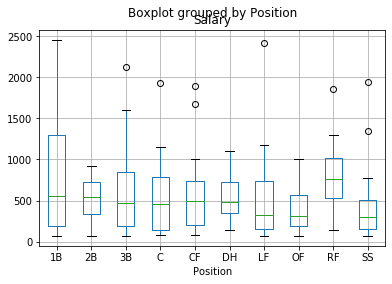

In [8]:
df_ct.boxplot(column= 'Salary', by='Position')

# 과업4

>포지션별 선수연봉 분산분석 하시오

>튜키방법으로 사후검정하시오.

>결론작성하시오.

## 분산분석


귀무가설 : 모든 포지션의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mui

대립가설 : 적어도 한 포지션의 선수연봉은 다르다.

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols    ## 집단 세개 이상의 평균비교 (=분산분석)
results = ols('Salary~Position',data=df_ct).fit()  #데이터~집단
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.926
Date:                Fri, 08 Nov 2019   Prob (F-statistic):             0.0495
Time:                        04:38:37   Log-Likelihood:                -1760.6
No. Observations:                 234   AIC:                             3541.
Df Residuals:                     224   BIC:                             3576.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        786.6667     93.475      8.416      0.000     602.464     970.870
Position[T.2B]  -272.7436    129.627     -2.104      0.036    -528.187     -17.300
Position[T.3B]  -168.7333    125.410     -1.345      0.180    -415.868      78.401
Position[T.C]   -267.6333    125.410     -2.134      0.034    -514.768     -20.499
Position[T.CF]  -220.8406    133.623     -1.653      0.100    -484.159      42.478
Position[T.DH]  -229.7576    166.738     -1.378      0.170    -558.333      98.817
Position[T.LF]  -274.2167    138.646     -1.978      0.049    -547.434      -0.999
Position[T.OF]  -395.8030    135.165     -2.928      0.004    -662.160    -129.446
Position[T.RF]    -5.6667    135.165     -0.042      0.967    -272.024     260.690
Position[T.SS]  -359.0897    129.627     -2.770      0.006    -614.533    -103.646
==============================================================================
Omnibus:                       64.011   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.378
Skew:                           1.335   Prob(JB):                     1.80e-29
Kurtosis:                       5.539   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
aov_table=sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
Position,3.634287e+06,9.0,1.925634,0.049487
Residual,4.697330e+07,224.0,NaN,NaN


0.0495는 0.05보다 작으므로 귀무가설을 기각. 즉, 적어도 한 포지션의 선수 연봉은 다르다.

## 튜키방법

귀무가설 : 그룹1 포지션과 그룹2 포지션의 선수연봉은 동일하다.

mu1=mu2=mu3=...=mut

대립가설 : 적어도 그룹1 포지션과 그룹2 포지션의 선수연봉은 다르다.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc=MultiComparison(df_ct.Salary, df_ct.Position)
print(mc.tukeyhsd())

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    1B     2B -272.7436 0.5228 -687.0166 141.5294  False
    1B     3B -168.7333    0.9 -569.5304 232.0637  False
    1B      C -267.6333 0.5046 -668.4304 133.1637  False
    1B     CF -220.8406 0.7968 -647.8853 206.2041  False
    1B     DH -229.7576    0.9 -762.6333 303.1182  False
    1B     LF -274.2167 0.5994 -717.3145 168.8812  False
    1B     OF  -395.803  0.104 -827.7753  36.1692  False
    1B     RF   -5.6667    0.9 -437.6389 426.3056  False
    1B     SS -359.0897 0.1533 -773.3627  55.1833  False
    2B     3B  104.0103    0.9 -288.1293 496.1498  False
    2B      C    5.1103    0.9 -387.0293 397.2498  False
    2B     CF    51.903    0.9 -367.0269 470.8329  False
    2B     DH    42.986    0.9  -483.409  569.381  False
    2B     LF   -1.4731    0.9 -436.7555 433.8094  False
    2B     OF -123.0594    0.9 

reject가 모두 False 이므로 귀무가설 채택, 그룹1 포지션과 그룹2 포지션의 선수연봉은 같다.

결론 : 분산분석 결과 요인 수준에 따른 포지션별 평균 차이가 있어도 쌍체 비교에서는 유의한 쌍체 쌍은 없을 수 있음.

전체적으로는 포지션별 선수연봉의 차이가 있지만, 쌍체비교를 통한 포지션별로는 차이가 없음

# 과업5
>포지션별 선수연봉 평균을 출력하시오.(groupdy 사용)

In [12]:
pd.DataFrame(df_ct.groupby('Position').Salary.mean()).sort_values(by='Salary', ascending=False)

,Salary
Position,
1B,786.666667
RF,781.000000
3B,617.933333
CF,565.826087
DH,556.909091
C,519.033333
2B,513.923077
LF,512.450000
SS,427.576923
